In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2,random_state=200)

In [5]:
len(X_train)

22

In [6]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] =X_train_scaled['age']/100

X_test_scaled =X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [7]:
X_train_scaled

,age,affordibility
18,0.19,0
17,0.58,1
8,0.62,1
5,0.56,1
21,0.26,0
25,0.54,1
27,0.46,1
19,0.18,1
3,0.52,0
7,0.60,0


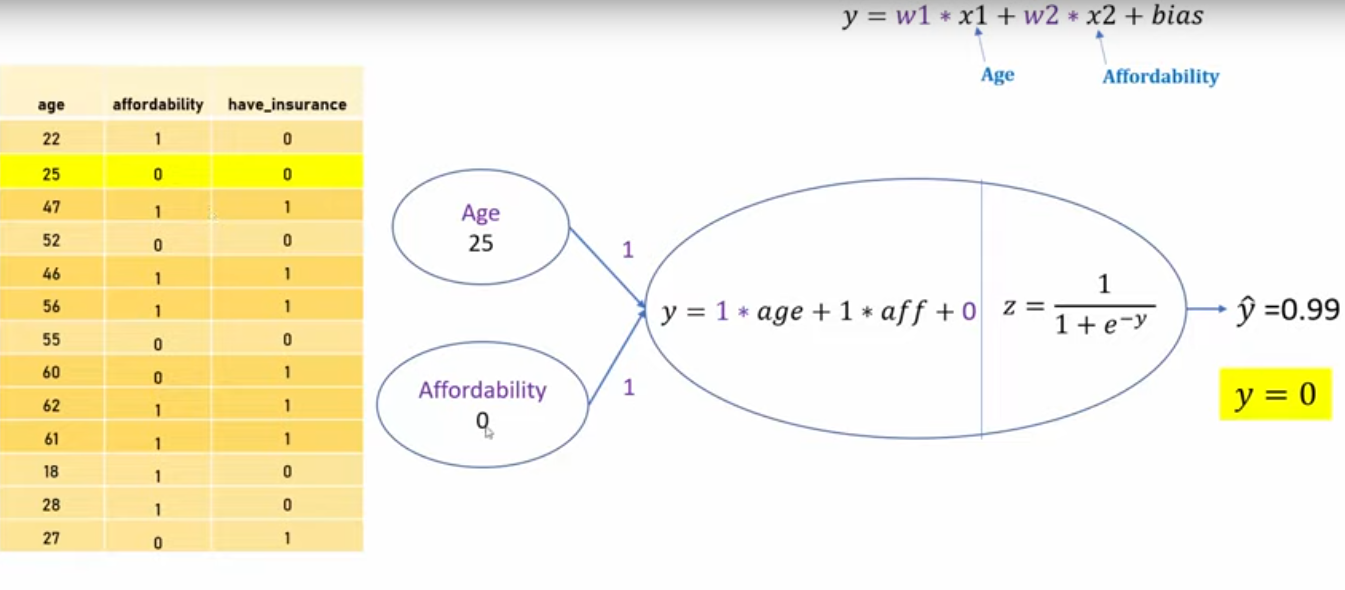

In [10]:
model =keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss ='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=5000)

Epoch 1/5000
1/1 [==============================] - 2s 2s/step - loss: 0.7100 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.7096 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.7092 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.7088 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 59ms/step - loss: 0.7081 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7077 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 42ms/step - loss: 0.7073 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.7070 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.7066 - accuracy: 0.5000
Epoch 11/50

In [11]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 296ms/step - loss: 0.3913 - accuracy: 1.0000


[0.391347736120224, 1.0]

In [12]:
X_test_scaled

,age,affordibility
13,0.29,0
24,0.50,1
2,0.47,1
20,0.21,1
0,0.22,1
22,0.40,1


In [13]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 207ms/step


array([[0.19191445],
       [0.72080976],
       [0.68872833],
       [0.36746815],
       [0.3795026 ],
       [0.6068631 ]], dtype=float32)

In [14]:
 y_test

13    0
24    1
2     1
20    0
0     0
22    1
Name: bought_insurance, dtype: int64

In [21]:
#to see optimized weight given by model w1,w2 and b

coef,intercept = model.get_weights()


coef,intercept

(array([[5.143364 ],
        [1.3059936]], dtype=float32),
 array([-2.9291937], dtype=float32))

### Build our own neural network without using tensorflow :

In [16]:
import math

def sigmoid(x):
    return 1/(1+math.exp(-x))

sigmoid(18)

0.9999999847700205

In [22]:
def prediction_function(age,affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

In [24]:
prediction_function(.29,0)

0.1919144463090132

In [25]:
prediction_function(.50,1)

0.7208097528993695

In [26]:
def log_loss(y_true,y_predicted):
    eplison = 1e-15
    y_predicted_new = [max(i,eplison) for i in y_predicted]
    y_predicted_new = [min(i,1-eplison) for i in y_predicted]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
    

In [28]:
def sigmoid_numpy(x):
    return 1/(1+np.exp(-x))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [42]:
# def gradient_descent(age,affordability,y_true,epochs,loss_threshould):
#     # w1,w2,bias
#     w1 = w2 = 1
#     bias = 0
#     rate = 0.5
#     n = len(age)
#     for i in range(epochs):
#         weighted_sum = w1*age +w2*affordability+ bias
#         y_predicted = sigmoid_numpy(weighted_sum)
#         loss= log_loss(y_true,y_predicted)
#         w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
#         w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))
        
#         biad_d = np.mean(y_predicted-y_true)

#         w1 = w1d - rate*w1d
#         w2 = w2d - rate*w2d
#         bias = bias - rate*biad_d

#         print(f'Epoch:{i}, w1:{w1},w2:{w2},bias:{bias},loss:{loss}')
#         if loss <=loss_threshould:
#             break
#     return w1,w2,bias

def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias



In [43]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,5000,0.4513)

Epoch:0, w1:0.9752557051750843, w2:0.9475579804862039, bias:-0.11404155315545433, loss:0.7099858172670256
Epoch:1, w1:0.9564507236010803, w2:0.9043096386504798, bias:-0.2134579806712307, loss:0.6795166677693261
Epoch:2, w1:0.943087737238143, w2:0.8696344342967461, bias:-0.29954343437724573, loss:0.6570816600902591
Epoch:3, w1:0.9345654097602865, w2:0.8426738500444858, bias:-0.3738129516780352, loss:0.6408376165609778
Epoch:4, w1:0.930246057192813, w2:0.8224556583766718, bias:-0.4378432023088965, loss:0.6291793786766294
Epoch:5, w1:0.9295071715360764, w2:0.8079940922804305, bias:-0.4931545021454853, loss:0.620812170366916
Epoch:6, w1:0.9317741225154837, w2:0.7983572866273416, bias:-0.5411382600739959, loss:0.6147500798124151
Epoch:7, w1:0.9365367301056056, w2:0.7927048760972232, bias:-0.583022216134286, loss:0.6102739830673861
Epoch:8, w1:0.943354311153746, w2:0.7903033619254426, bias:-0.6198620693965446, loss:0.6068757557108032
Epoch:9, w1:0.9518535803207996, w2:0.7905271222371775, bia

(5.134336303184888, 1.3588285037408439, -2.977882338505502)

In [44]:
#writing our own nueral network class
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias


In [45]:


customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)



Epoch:0, w1:0.9752557051750843, w2:0.9475579804862039, bias:-0.11404155315545433, loss:0.7099858172670256
Epoch:50, w1:1.558827843329061, w2:1.0826985671517708, bias:-1.2494352870340097, loss:0.5616546575868028
Epoch:100, w1:2.2993213847276386, w2:1.251446491975789, bias:-1.691937225932125, loss:0.5304066602769483
Epoch:150, w1:2.980385562437127, w2:1.3135137125899372, bias:-2.028530426628642, loss:0.5070358172812177
Epoch:200, w1:3.598338841928414, w2:1.336745092986837, bias:-2.3085926586990317, loss:0.4885200113786089
Epoch:250, w1:4.156568584799929, w2:1.346605778527935, bias:-2.5530803069455414, loss:0.4735993156106643
Epoch:293, w1:4.593204204305432, w2:1.3519289297905275, bias:-2.742576334114777, loss:0.4630214010691747
Final weights and bias: w1: 4.593204204305432, w2: 1.3519289297905275, bias: -2.742576334114777


In [46]:


coef, intercept



(array([[5.143364 ],
        [1.3059936]], dtype=float32),
 array([-2.9291937], dtype=float32))

In [47]:
customModel.predict(X_test_scaled)

13    0.196148
24    0.712172
2     0.683122
20    0.395064
0     0.406093
22    0.609839
dtype: float64

In [48]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 300ms/step


array([[0.19191445],
       [0.72080976],
       [0.68872833],
       [0.36746815],
       [0.3795026 ],
       [0.6068631 ]], dtype=float32)